In [1]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

with open('210730_142054206402.pkl', 'rb') as f:
    saved_data = pickle.load(f)

In [2]:
# genome for first individual in pareto front
genome = saved_data.pareto[0]['data']

# metadata for first individual in pareto front
stats = saved_data.pareto[0]['meta']

In [3]:
for g in genome:
    print(g.shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [4]:
genome[0].shape

(784, 100)

In [5]:
adj = np.zeros((784+100,784+100))
adj[:784, -100:] = genome[0]

In [6]:
adj

array([[ 0.        ,  0.        ,  0.        , ..., -2.07998569,
        -0.34765368, -0.76693415],
       [ 0.        ,  0.        ,  0.        , ...,  0.69948061,
        -0.90481945, -0.85539891],
       [ 0.        ,  0.        ,  0.        , ..., -0.15759708,
        -0.98363629, -0.02950051],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
D = nx.DiGraph(adj)

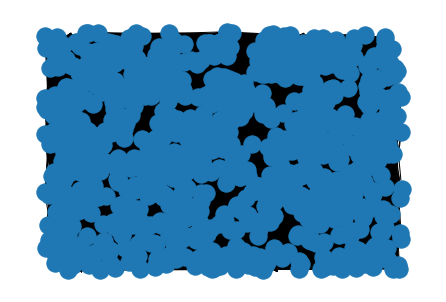

In [8]:
nx.draw_random(D)

In [9]:
D.nodes.data()

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}, 39: {}, 40: {}, 41: {}, 42: {}, 43: {}, 44: {}, 45: {}, 46: {}, 47: {}, 48: {}, 49: {}, 50: {}, 51: {}, 52: {}, 53: {}, 54: {}, 55: {}, 56: {}, 57: {}, 58: {}, 59: {}, 60: {}, 61: {}, 62: {}, 63: {}, 64: {}, 65: {}, 66: {}, 67: {}, 68: {}, 69: {}, 70: {}, 71: {}, 72: {}, 73: {}, 74: {}, 75: {}, 76: {}, 77: {}, 78: {}, 79: {}, 80: {}, 81: {}, 82: {}, 83: {}, 84: {}, 85: {}, 86: {}, 87: {}, 88: {}, 89: {}, 90: {}, 91: {}, 92: {}, 93: {}, 94: {}, 95: {}, 96: {}, 97: {}, 98: {}, 99: {}, 100: {}, 101: {}, 102: {}, 103: {}, 104: {}, 105: {}, 106: {}, 107: {}, 108: {}, 109: {}, 110: {}, 111: {}, 112: {}, 113: {}, 114: {}, 115: {}, 116: {}, 117: {}, 118: {}, 119: {}, 120: {}, 121: {}

In [13]:
for i in range(784):
    D.nodes[i]['bipartite'] = 0
for i in range(784,784+100):
    D.nodes[i]['bipartite'] = 1

In [14]:
D.nodes.data()

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 4: {'bipartite': 0}, 5: {'bipartite': 0}, 6: {'bipartite': 0}, 7: {'bipartite': 0}, 8: {'bipartite': 0}, 9: {'bipartite': 0}, 10: {'bipartite': 0}, 11: {'bipartite': 0}, 12: {'bipartite': 0}, 13: {'bipartite': 0}, 14: {'bipartite': 0}, 15: {'bipartite': 0}, 16: {'bipartite': 0}, 17: {'bipartite': 0}, 18: {'bipartite': 0}, 19: {'bipartite': 0}, 20: {'bipartite': 0}, 21: {'bipartite': 0}, 22: {'bipartite': 0}, 23: {'bipartite': 0}, 24: {'bipartite': 0}, 25: {'bipartite': 0}, 26: {'bipartite': 0}, 27: {'bipartite': 0}, 28: {'bipartite': 0}, 29: {'bipartite': 0}, 30: {'bipartite': 0}, 31: {'bipartite': 0}, 32: {'bipartite': 0}, 33: {'bipartite': 0}, 34: {'bipartite': 0}, 35: {'bipartite': 0}, 36: {'bipartite': 0}, 37: {'bipartite': 0}, 38: {'bipartite': 0}, 39: {'bipartite': 0}, 40: {'bipartite': 0}, 41: {'bipartite': 0}, 42: {'bipartite': 0}, 43: {'bipartite': 0}, 44: {'bipartite': 0}, 45: {'

In [16]:
from networkx.algorithms import bipartite

X, Y = bipartite.sets(D)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
print(pos)

{0: (1, 0), 1: (1, 1), 2: (1, 2), 3: (1, 3), 4: (1, 4), 5: (1, 5), 6: (1, 6), 7: (1, 7), 8: (1, 8), 9: (1, 9), 10: (1, 10), 11: (1, 11), 12: (1, 12), 13: (1, 13), 14: (1, 14), 15: (1, 15), 16: (1, 16), 17: (1, 17), 18: (1, 18), 19: (1, 19), 20: (1, 20), 21: (1, 21), 22: (1, 22), 23: (1, 23), 24: (1, 24), 25: (1, 25), 26: (1, 26), 27: (1, 27), 28: (1, 28), 29: (1, 29), 30: (1, 30), 31: (1, 31), 32: (1, 32), 33: (1, 33), 34: (1, 34), 35: (1, 35), 36: (1, 36), 37: (1, 37), 38: (1, 38), 39: (1, 39), 40: (1, 40), 41: (1, 41), 42: (1, 42), 43: (1, 43), 44: (1, 44), 45: (1, 45), 46: (1, 46), 47: (1, 47), 48: (1, 48), 49: (1, 49), 50: (1, 50), 51: (1, 51), 52: (1, 52), 53: (1, 53), 54: (1, 54), 55: (1, 55), 56: (1, 56), 57: (1, 57), 58: (1, 58), 59: (1, 59), 60: (1, 60), 61: (1, 61), 62: (1, 62), 63: (1, 63), 64: (1, 64), 65: (1, 65), 66: (1, 66), 67: (1, 67), 68: (1, 68), 69: (1, 69), 70: (1, 70), 71: (1, 71), 72: (1, 72), 73: (1, 73), 74: (1, 74), 75: (1, 75), 76: (1, 76), 77: (1, 77), 78: (

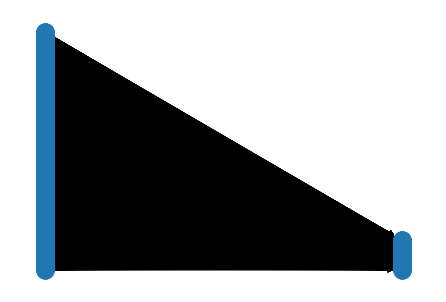

In [17]:
nx.draw(D, pos=pos)
plt.show()